# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Daffa Zulfahmi Al-Ahyar
- **Email:** daffa3704@gmail.com
- **ID Dicoding:** Daffa Zulfahmi Al-Ahyar

## Menentukan Pertanyaan Bisnis


- Berapa rata-rata sepeda yang disewakan dalam sehari setiap minggunya?
- Bagaimana tren penyewaan sepeda berdasarkan musim dalam satu tahun?
- Bagaimana pengaruh hari kerja terhadap jumlah penyewaan sepeda?







## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai  tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek jumlah duplikasi

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek jumlah duplikasi

In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengubah nama kolom pada day_df dan hour_df

In [10]:
day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "cnt" : "count"}, inplace=True
)

hour_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "hr" : "hour",
    "weathersit" : "weather",
    "cnt" : "count"}, inplace=True
)

Memperbaiki tipe data

In [11]:
datetime_columns = ["date"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

datetime_columns = ["date"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## Exploratory Data Analysis (EDA)

Mneggabungkan day_df dengan hour_df

In [14]:
bike_df = day_df.merge(hour_df, on='date', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,date,season_hour,year_hour,month_hour,holiday_hour,weekday_hour,workingday_hour,weather_hour,temp_hour,...,weekday_day,workingday_day,weather_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,count_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
bike_df['season_day'] = bike_df['season_day'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

In [16]:
# Mengambil hari dalam seminggu
day_df['day_of_week'] = day_df['date'].dt.day_name()
days_mapping = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}
day_df['day_of_week'] = day_df['day_of_week'].map(days_mapping)
rentals_by_day = day_df.groupby('day_of_week')['count'].mean()
print(rentals_by_day)

day_of_week
Jumat     4690.288462
Kamis     4667.259615
Minggu    4228.828571
Rabu      4548.538462
Sabtu     4550.542857
Selasa    4510.663462
Senin     4338.123810
Name: count, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1
Berapa rata-rata sepeda yang disewakan dalam sehari setiap minggunya?

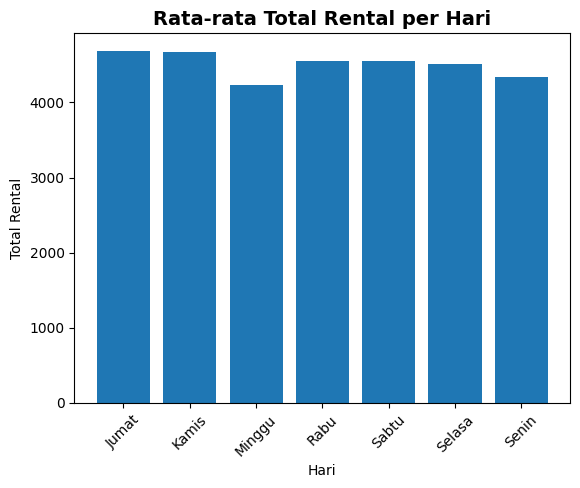

In [17]:
plt.bar(rentals_by_day.index, rentals_by_day)
plt.xlabel('Hari')
plt.ylabel('Total Rental')
plt.title('Rata-rata Total Rental per Hari', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2
Bagaimana tren penyewaan sepeda berdasarkan musim dalam satu tahun?

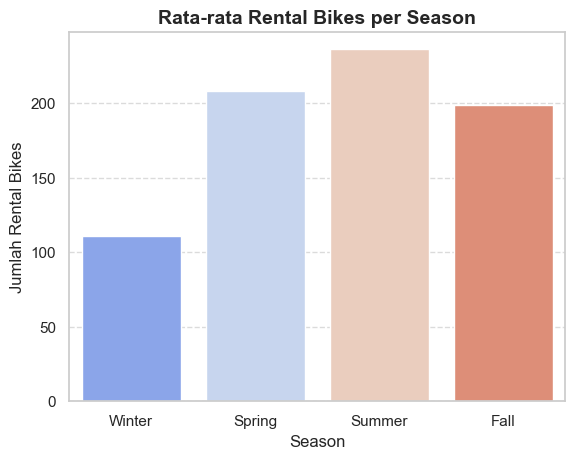

In [18]:
rentals_by_season = hour_df.groupby('season')['count'].mean()

sns.set_theme(style="whitegrid")
palette = sns.color_palette("coolwarm", 4)
sns.barplot(x=['Winter', 'Spring', 'Summer', 'Fall'], y=rentals_by_season, hue=['Winter', 'Spring', 'Summer', 'Fall'], palette=palette, legend=False)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Jumlah Rental Bikes', fontsize=12)
plt.title('Rata-rata Rental Bikes per Season', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 3
Bagaimana pengaruh hari kerja terhadap jumlah penyewaan sepeda?

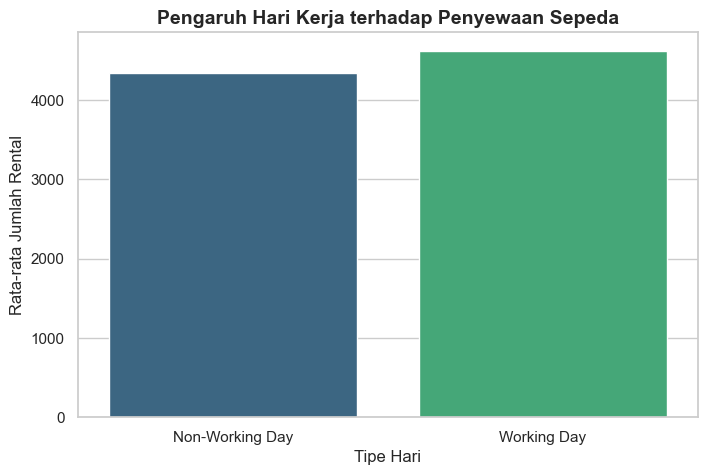

In [19]:
rentals_by_workingday = bike_df.groupby('workingday_hour')['count_hour'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=['Non-Working Day', 'Working Day'], y=rentals_by_workingday, hue=['Non-Working Day', 'Working Day'], palette='viridis', legend=False)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Rental', fontsize=12)
plt.title('Pengaruh Hari Kerja terhadap Penyewaan Sepeda', fontsize=14, fontweight='bold')
plt.show()

## Conclusion

### **1. Berapa rata-rata sepeda yang disewakan dalam sehari setiap minggunya?**
Berdasarkan hasil analisis data, penyewaan sepeda paling banyak terjadi pada hari jumat dan kamis. Sedangkan penyewaan sepeda paling sedikit terjadi pada hari minggu.


### **2. Bagaimana tren penyewaan sepeda berdasarkan musim dalam satu tahun?** 
Berdasarkan data yang telah divisualisasikan, musim panas (summer) adalah musim dengan intensitas penyewaan sepeda paling tinggi. Sedangkan musim dingin adalah musim dengan intensitas penyewaan sepeda paling rendah.

### **3. Bagaimana pengaruh hari kerja terhadap jumlah penyewaan sepeda?**
Penyewaan sepeda pada hari kerja lebih tinggi dibangingkan dengan hari non kerja seperti hari libur dan akhir pekan.